Berdasarkan eksplorasi awal, dataset ini berisi beberapa fitur tentang pelanggan sebuah bank, dan kolom target "Exited" yang menunjukkan apakah pelanggan tersebut churn (bernilai 1) atau tidak (bernilai 0).

**Fitur-fitur yang tersedia di dataset ini meliputi:**
1. RowNumber: Nomor baris
2. CustomerId: ID pelanggan
3. Surname: Nama belakang pelanggan
4. CreditScore: Skor kredit pelanggan
5. Geography: Negara asal pelanggan
6. Gender: Jenis kelamin pelanggan
7. Age: Umur pelanggan
8. Tenure: Lamanya pelanggan menjadi nasabah bank
9. Balance: Saldo rekening pelanggan
10. NumOfProducts: Jumlah produk yang dimiliki pelanggan di bank
11. HasCrCard: Apakah pelanggan memiliki kartu kredit (1 = Ya, 0 = Tidak)
12. IsActiveMember: Apakah pelanggan aktif (1 = Ya, 0 = Tidak)
13. EstimatedSalary: Gaji estimasi pelanggan
14. Exited: Apakah pelanggan churn (1 = Ya, 0 = Tidak)

#### IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


#### Baca dataset

In [2]:
df = pd.read_csv(r'D:\FILE_IRFAN_KARIM\Rakamin DS MSIB\Dataset/Churn_Modelling.csv')

#### Cek nilai yang hilang dan duplikat

In [3]:
cek_mv = df.isna().sum()
cek_duplikat = df.duplicated().sum()
print(f'ini merupakan nilai missing value\n{cek_mv}\nini merupakan nilai yang duplikat: {cek_duplikat}')
display(df.sample(5))

ini merupakan nilai missing value
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
ini merupakan nilai yang duplikat: 0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4430,4431,15654379,Onwuatuegwu,588,Spain,Male,59,4,0.00,2,1,1,27435.41,0
6226,6227,15792305,Mountgarrett,762,Germany,Male,46,6,123571.77,3,0,1,57014.17,1
9674,9675,15578098,Jamieson,600,France,Male,31,8,0.00,2,1,1,121555.51,0
482,483,15750658,Obiuto,798,France,Male,37,8,0.00,3,0,0,110783.28,0
1688,1689,15804610,Valdez,601,France,Female,41,1,0.00,2,0,1,160607.06,0


#### Hapus kolom yang tidak digunakan

In [4]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None


#### Lakukan transformasi fitur kategorik ke numerik

In [5]:
#Making encoder for each categorical column
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first=True, dtype='int') 
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [6]:
df.drop(['Geography_Spain'], axis=1, inplace=True)

#### Ubah nama column agar mudah untuk dipanggil

In [7]:
# Rename the 'OldName' column to 'NewName'
df.rename(columns={'Geography_Germany': 'Geography', 'Gender_Male':'Gender'}, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Geography        10000 non-null  int32  
 10  Gender           10000 non-null  int32  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB
None


### Univariate Analysis

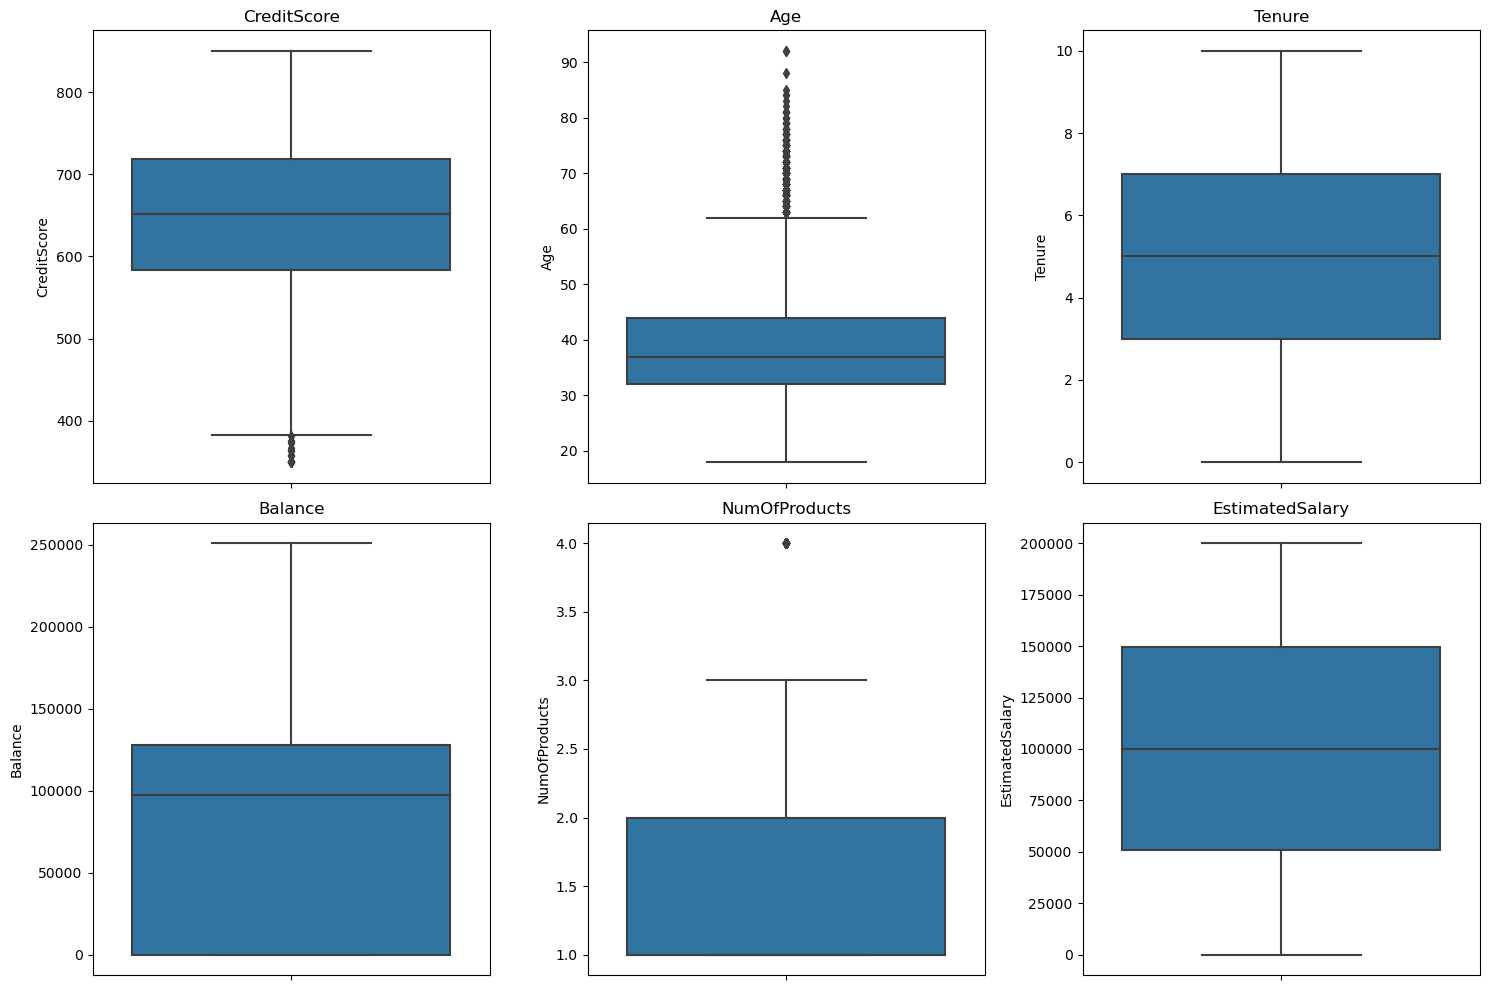

In [8]:
#Melakukan pengencekan outlier menggunakan boxplot
features2analyze = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(15,10))
for i, feature in enumerate(features2analyze, 1):
    plt.subplot(2,3,i)
    sns.boxplot(y=df[feature])
    plt.title(feature)
    plt.tight_layout()

plt.show()

dapat dilihat pada visualisasi diatas masih terdapat outlier pada 3 kolom yang ada maka dari itu saya mencoba untuk menghapus outlier menggunakan IQR

#### Buat Fungsi untuk menghapus outlier menggunakan IQR

In [9]:
import pandas as pd

def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    IQR = Q3 - Q1
    low_limit = Q1 - (1.5 * IQR)
    high_limit = Q3 + (1.5 * IQR)
    
    filtered_entries = ((df[column_name] >= low_limit) & (df[column_name] <= high_limit)) 
    df = df[filtered_entries]
    
    return df

#### Lakukan looping untuk menghapus outlier pada kolom2 yang diinginkan

In [10]:
columns_to_remove_outliers = ['CreditScore', 'Age', 'EstimatedSalary', 'NumOfProducts']

for column_name in columns_to_remove_outliers:
    df = remove_outliers(df, column_name)

#### Cek hasil handle outlier menggunakan boxplot

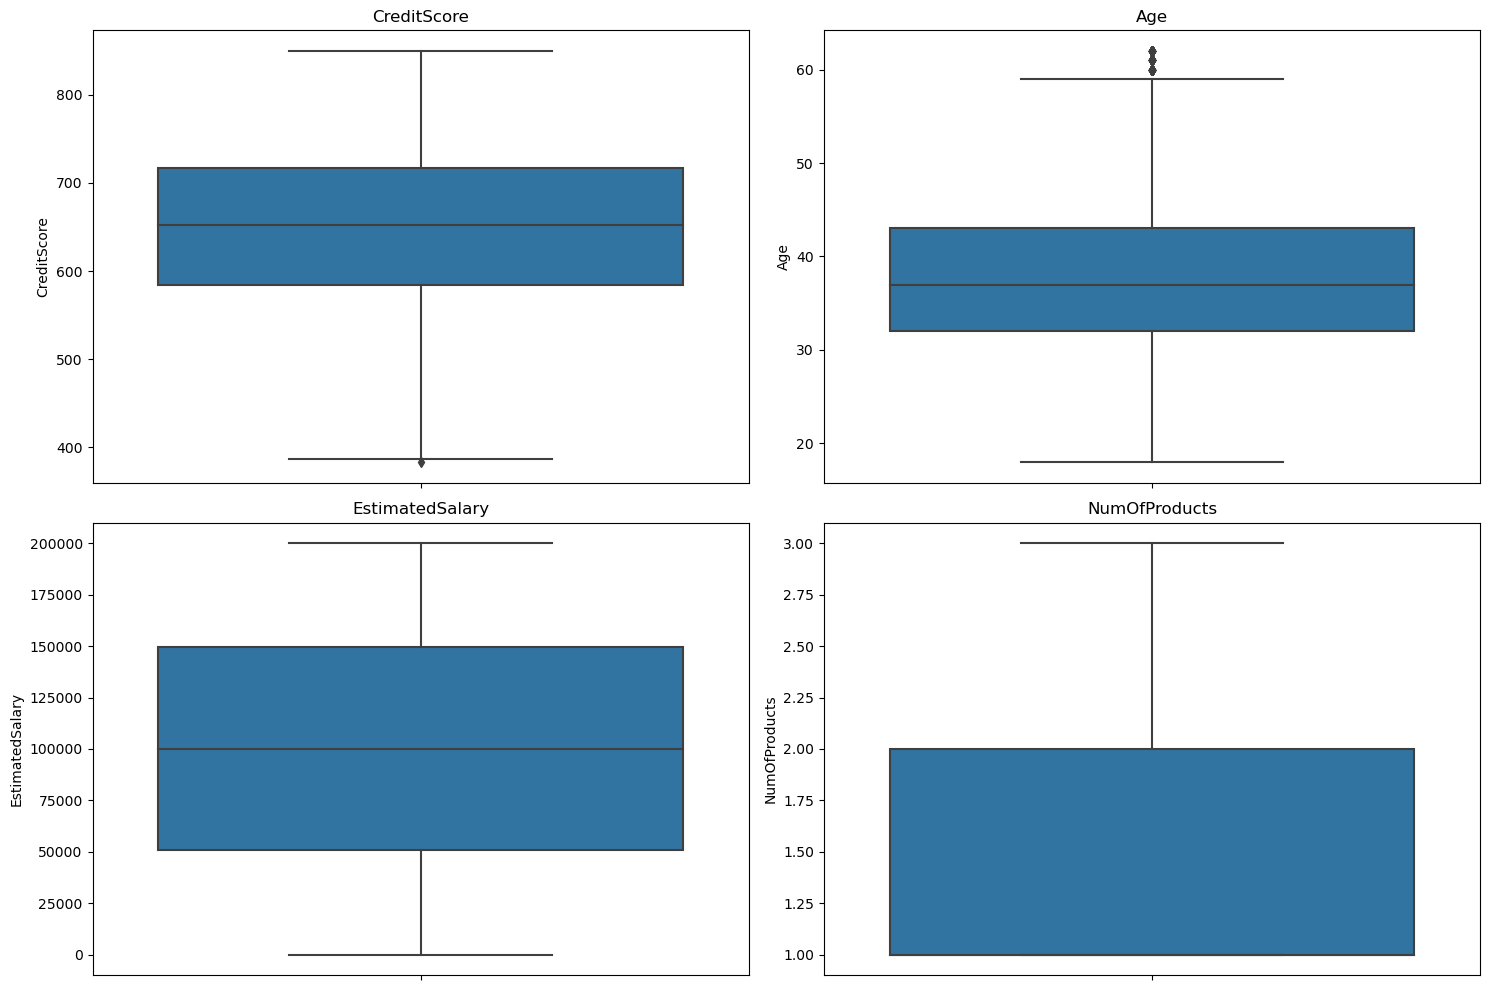

In [11]:
after_remove_outlier = ['CreditScore', 'Age',  'EstimatedSalary', 'NumOfProducts']

plt.figure(figsize=(15,10))
for i, feature in enumerate(after_remove_outlier, 1):
    plt.subplot(2,2,i)
    sns.boxplot(y=df[feature])
    plt.title(feature)
    plt.tight_layout()

plt.show()

**dapat dilihat pada visualisasi boxplot diatas, outlier yang sudah berkurang dari yang sebelumnya lumayan ekstrim pada beberapa fitur**

### Multivariate Analysis

#### Heatmap analysis

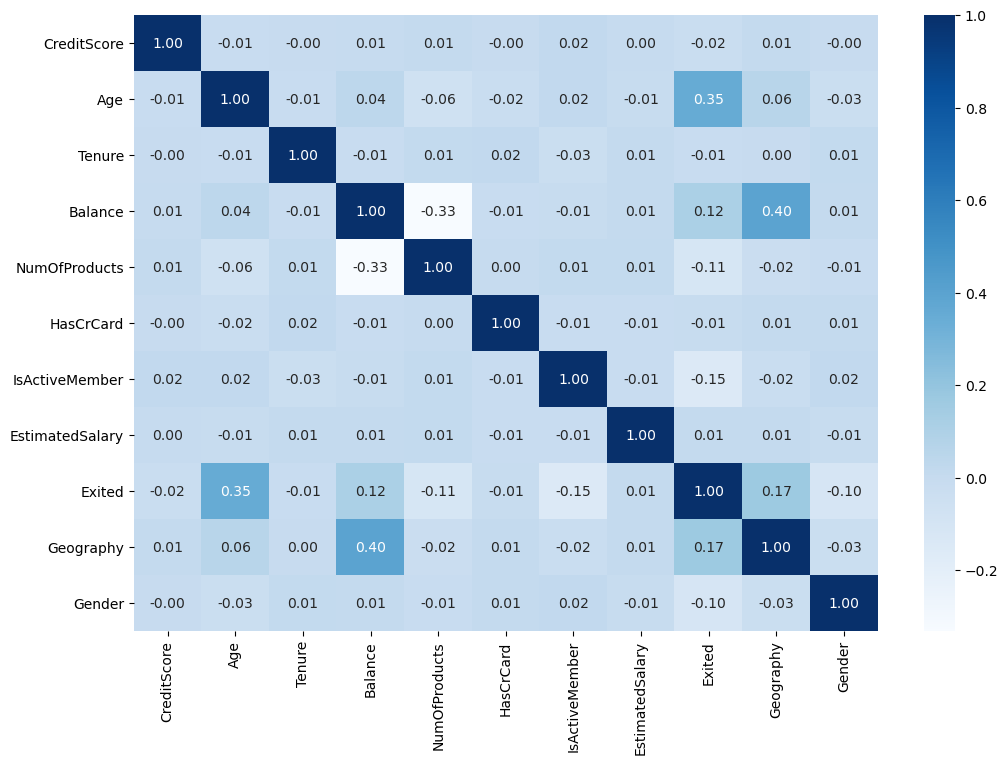

In [12]:
#Melihat korelasi antar fitur dan juga antar label target menggunakan heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

**Pada visualisasi diatas, tidak ada fitur yang memiliki korelasi tinggi atau fitur yang redundan**

#### Pairplot analysis

<Figure size 1000x1000 with 0 Axes>

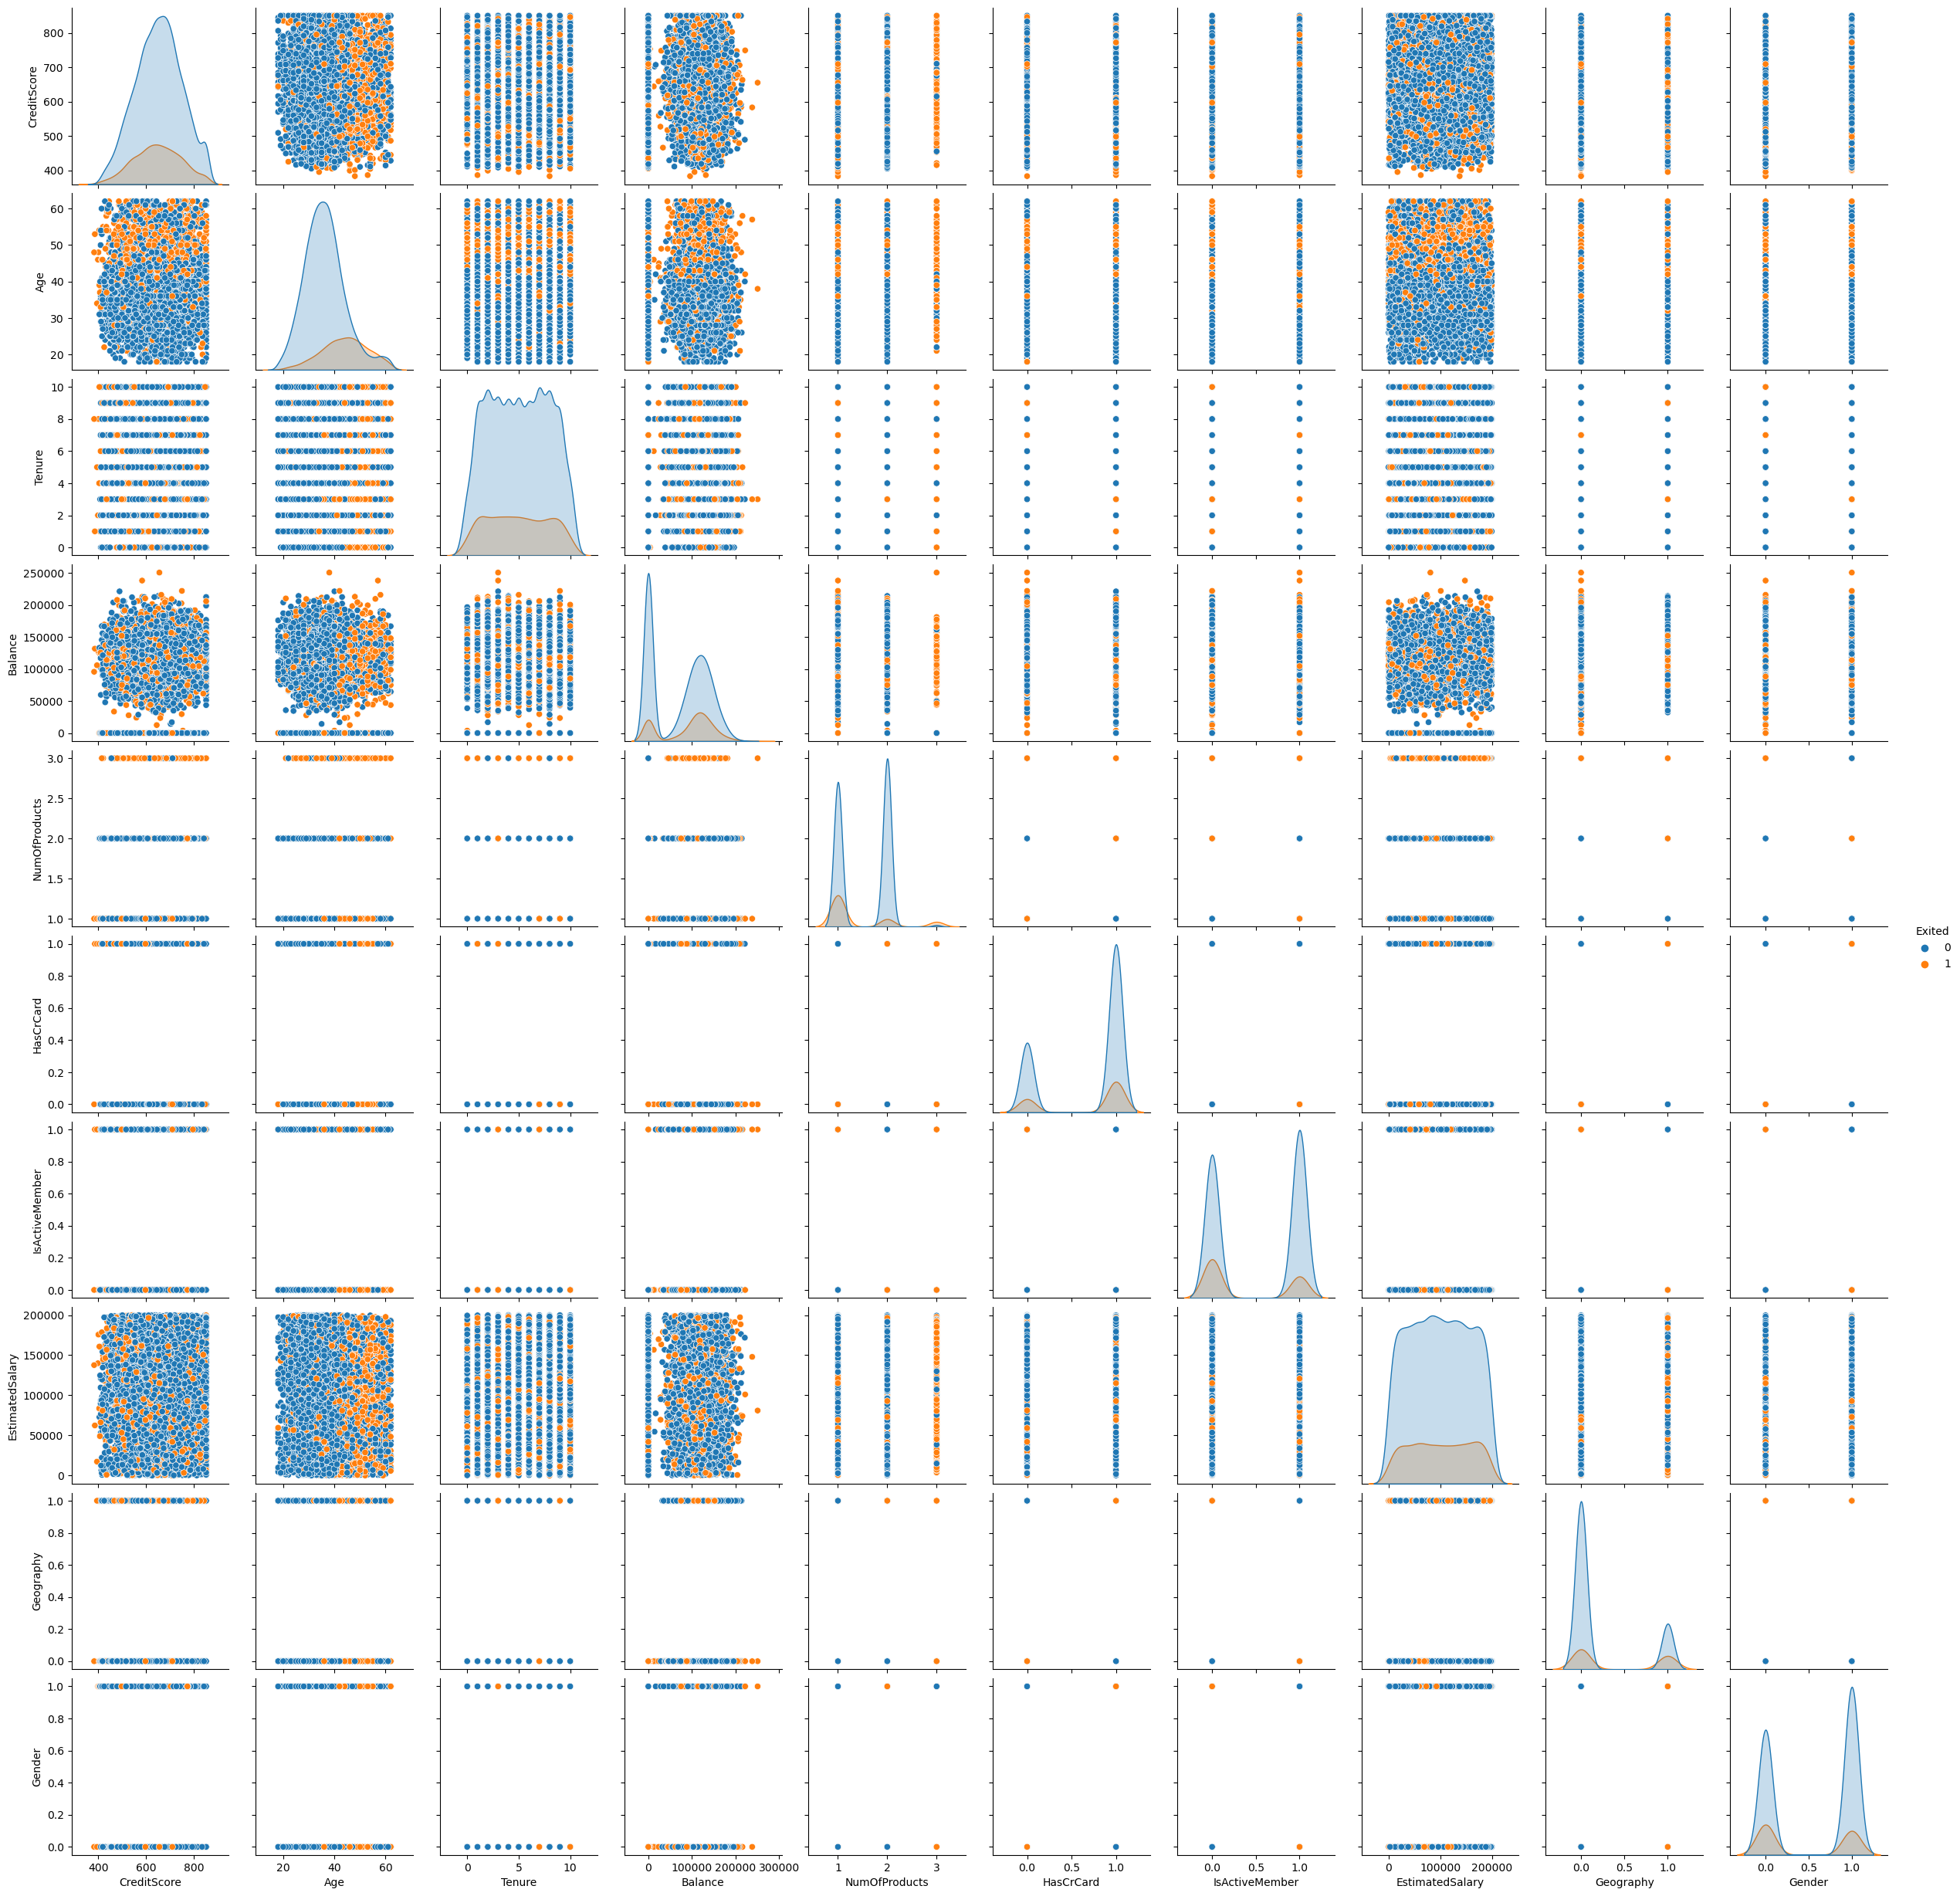

In [13]:
plt.figure(figsize=(10,10))
sns.pairplot(df, diag_kind='kde', hue='Exited')
plt.show()

#### Handle Class Imbalance

In [14]:
#Cek label target
print('Angka 0 bermakna tidak churn\nAngka 1 bermakna churn\n', df['Exited'].value_counts())

Angka 0 bermakna tidak churn
Angka 1 bermakna churn
 0    7677
1    1891
Name: Exited, dtype: int64


In [15]:
from imblearn import under_sampling, over_sampling
#Making different variabel for oversampling
X_imb = df[[col for col in df.columns if col not in['Exited']]].values
y_imb = df['Exited'].values
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(sampling_strategy=0.5).fit_resample(X_imb,y_imb)
print('Berikut nilai hasil dari oversampling:\n', pd.Series(y_over_SMOTE).value_counts())

over_data = pd.DataFrame(X_over_SMOTE, columns=df.drop('Exited', axis=1).columns)
over_data['Exited'] = y_over_SMOTE

df = over_data
display(df.sample(5))

Berikut nilai hasil dari oversampling:
 0    7677
1    3838
dtype: int64


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender,Exited
10514,585.978018,48.834619,7.510409,0.00,1.372398,0.813801,0.0,175078.619456,0.0,0.186199,1
1069,713.000000,52.000000,0.000000,185891.54,1.000000,1.000000,1.0,46369.570000,0.0,0.000000,1
8079,638.000000,43.000000,3.000000,145860.98,1.000000,1.000000,1.0,142763.510000,0.0,0.000000,1
8338,778.000000,48.000000,3.000000,102290.56,2.000000,1.000000,0.0,182691.310000,1.0,0.000000,0
1004,670.000000,38.000000,4.000000,119624.54,2.000000,1.000000,1.0,110472.120000,0.0,0.000000,0


In [16]:
# Convert the column from float to int
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography', 'Gender', 'Exited']] = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography', 'Gender', 'Exited']].astype(int)

# Cek perubahan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CreditScore      11515 non-null  int32
 1   Age              11515 non-null  int32
 2   Tenure           11515 non-null  int32
 3   Balance          11515 non-null  int32
 4   NumOfProducts    11515 non-null  int32
 5   HasCrCard        11515 non-null  int32
 6   IsActiveMember   11515 non-null  int32
 7   EstimatedSalary  11515 non-null  int32
 8   Geography        11515 non-null  int32
 9   Gender           11515 non-null  int32
 10  Exited           11515 non-null  int32
dtypes: int32(11)
memory usage: 494.9 KB


#### Split Data Train & Test

In [17]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
print(X.shape)
print(y.shape)

(11515, 10)
(11515,)


In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = X.columns.to_list()
for n in numerical_features:
  scaler = ss.fit(X_train[[n]])
  X_train[n] = scaler.transform(X_train[[n]])
  X_test[n] = scaler.transform(X_test[[n]])
  # scaler.to_pickle(filename)

In [20]:
display('Ini merupakan kolom train yang sudah direscaling:', X_train.head())
display('Ini merupakan kolom test yang sudah direscaling:', X_test.head())

'Ini merupakan kolom train yang sudah direscaling:'

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender
2840,-0.646189,-1.093939,-1.050980,-1.272191,0.987751,-1.404271,1.128834,-0.030495,-0.577732,1.021826
11029,0.317218,-0.189071,0.374977,0.339908,-0.842426,0.712113,-0.885870,0.669965,1.730905,-0.978640
3794,0.563422,-1.093939,1.800934,0.158200,-0.842426,0.712113,-0.885870,-0.199938,-0.577732,-0.978640
10009,-0.507030,0.376472,-1.050980,-1.272191,-0.842426,0.712113,-0.885870,-0.873689,-0.577732,-0.978640
4974,-2.348208,-0.641505,1.087956,-1.272191,-0.842426,0.712113,1.128834,-0.525835,-0.577732,-0.978640


'Ini merupakan kolom test yang sudah direscaling:'

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender
5087,-0.292940,-0.754613,0.018488,1.629847,-0.842426,0.712113,1.128834,0.849208,-0.577732,1.021826
2020,1.130761,-0.641505,0.374977,0.193516,0.987751,0.712113,1.128834,-0.996740,1.730905,-0.978640
2899,-0.635485,-1.093939,-1.050980,1.429558,0.987751,0.712113,-0.885870,0.388640,-0.577732,-0.978640
10045,0.402854,1.620665,-0.338001,0.514204,-0.842426,0.712113,-0.885870,-0.858757,-0.577732,1.021826
3942,-0.945916,-0.189071,0.018488,-1.272191,0.987751,0.712113,-0.885870,-0.294580,-0.577732,1.021826


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    #
    score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances = feat_importances.nlargest(25)  # Ambil 25 fitur teratas
    total_importance = feat_importances.sum()
    feat_importances_percentage = (feat_importances / total_importance) * 100  # Hitung persentasenya

    # Buat bar plot dengan informasi persentase
    fig, ax = plt.subplots(figsize=(10, 8))
    feat_importances_percentage.plot(kind='barh', ax=ax)
    ax.invert_yaxis()

    plt.xlabel('Percentage Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance with Percentage')

    # Tambahkan nilai persentase di atas tiap bar
    for i, v in enumerate(feat_importances_percentage):
        ax.text(v, i, f'{v:.2f}%', color='black', va='center')

    plt.show()

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Modeling

### Create Random Forest Model

#### Fit Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.83
Precision (Train Set): 1.00
Precision (Test Set): 0.78
Recall (Train Set): 1.00
Recall (Test Set): 0.69
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.73
roc_auc (test-proba): 0.89
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.8929300437261203


### Model Evaluation

#### Hyperparameter Tuning untuk Model Random Forest

In [45]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 25, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 50, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 50, 15)]
min_samples_leaf = [int(x) for x in np.linspace(2, 100, 15)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Train Set): 0.85
Accuracy (Test Set): 0.82
Precision (Train Set): 0.83
Precision (Test Set): 0.75
Recall (Train Set): 0.69
Recall (Test Set): 0.64
F1-Score (Train Set): 0.75
F1-Score (Test Set): 0.69
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.93
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.894206981211345


#### Learning Curve for RFC

param value: 1; train: 1.0; test: 0.8924667506083996
param value: 5; train: 0.971198327938876; test: 0.890731353152429
param value: 9; train: 0.9454445518187815; test: 0.8861040079254011
param value: 13; train: 0.9320713447311927; test: 0.8852746320812491
param value: 17; train: 0.9202824147311708; test: 0.8831258813309976
param value: 21; train: 0.9133414636298851; test: 0.8822862097867112
param value: 25; train: 0.9080049912519332; test: 0.8805641586086925
param value: 29; train: 0.9028959768821583; test: 0.879677584430461
param value: 33; train: 0.8980234526512267; test: 0.878217120300299
param value: 37; train: 0.895880424518415; test: 0.8777953779170198
param value: 41; train: 0.8936995441738759; test: 0.8761808596070705
param value: 45; train: 0.8923986760413288; test: 0.8756679812114914
param value: 49; train: 0.8850148402733191; test: 0.8726492437998912
param value: 53; train: 0.8865594725125374; test: 0.8738982647550729
param value: 57; train: 0.8827989345671086; test: 0.87201

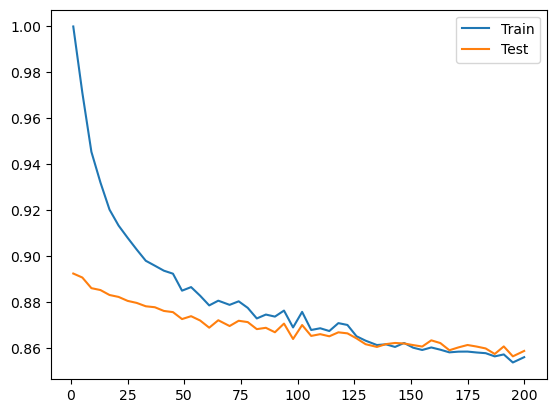

In [24]:
#learning curve
param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
#param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
#param_values = [int(x) for x in np.linspace(2, 50, 15)] # min_samples_split
#param_values = [int(x) for x in np.linspace(2, 50, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=75, min_samples_leaf=c)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Feature Importance pada model RFC

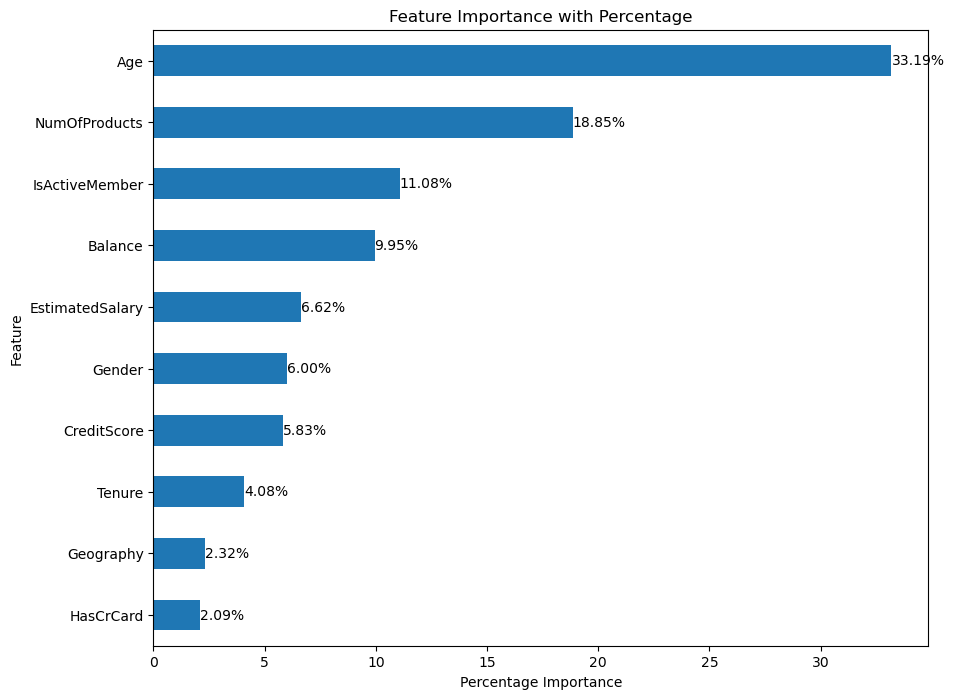

In [39]:
show_feature_importance(rs.best_estimator_)

#### Buat Analisa Confussion Matrix dan Clasification Report

Text(0.5, 1.0, 'Confusion Matrix')

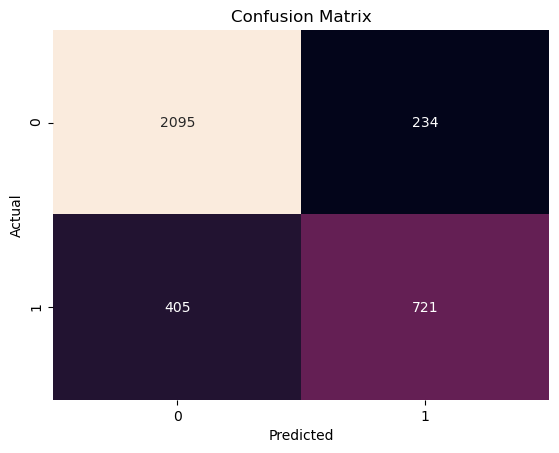

In [61]:
rf_pred = rs.predict(X_test)
cf = confusion_matrix(y_test, rf_pred)

# Visualisasi confusion matrix dengan nilai 0 dan 1 di atas kolom
sns.heatmap(cf, annot=True, fmt='.0f', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [27]:
rf_pred = rs.predict(X_test)
report = classification_report(y_test, rf_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      2329
           1       0.75      0.63      0.68      1126

    accuracy                           0.81      3455
   macro avg       0.79      0.76      0.77      3455
weighted avg       0.81      0.81      0.81      3455



### Making XGBoost Model

In [28]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.83
Precision (Train Set): 0.95
Precision (Test Set): 0.75
Recall (Train Set): 0.92
Recall (Test Set): 0.70
F1-Score (Train Set): 0.94
F1-Score (Test Set): 0.73
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.99
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.8928986147614795


### Model Evaluation

### Hyperparameter Tuning for XGBoost

In [29]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(0, 5, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 15, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num=11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Train Set): 0.85
Accuracy (Test Set): 0.82
Precision (Train Set): 0.82
Precision (Test Set): 0.75
Recall (Train Set): 0.72
Recall (Test Set): 0.67
F1-Score (Train Set): 0.76
F1-Score (Test Set): 0.71
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.92
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.8942509838742044


### Learning curve for XGBoost

param value: 0; train: 0.9871259732637901; test: 0.8913285037602185
param value: 15; train: 0.9534985234190048; test: 0.8884384626002974
param value: 30; train: 0.9365130156450292; test: 0.889764319984259
param value: 45; train: 0.916977964910655; test: 0.8744042793505624
param value: 60; train: 0.9094882601606643; test: 0.8762788594194598
param value: 75; train: 0.9017926090419488; test: 0.8755491993377196
param value: 90; train: 0.8953133997656886; test: 0.8739577510225156
param value: 105; train: 0.8913763560606562; test: 0.8734015925541496
param value: 120; train: 0.8885269256778373; test: 0.8736896814967966
param value: 135; train: 0.8847997583525835; test: 0.8729514416649443
param value: 150; train: 0.8808255519114471; test: 0.8731419121174289


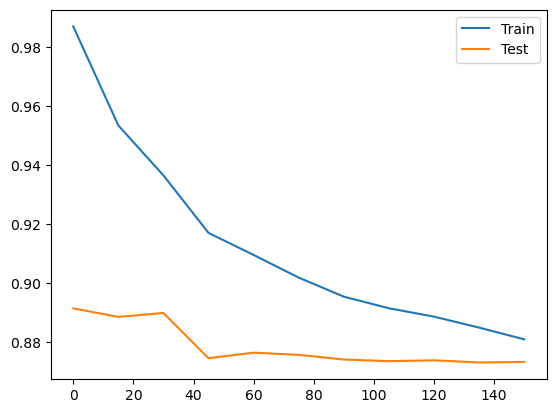

In [30]:
#learning curve
#param_values = [int(x) for x in np.linspace(10, 220, 50)] # 'max_depth'
#param_values = [int(x) for x in np.linspace(1, 200, 11)] # 'min_child_weight'
#param_values = [float(x) for x in np.linspace(0, 200, num = 11)] # 'gamma' 

#param_values = [float(x) for x in np.linspace(0, 150, num=11)] # 'colsample_bytree'
#param_values = [float(x) for x in np.linspace(0, 150, num = 11)] # 'eta'

#param_values = [float(x) for x in np.linspace(0, 150, num = 11)] # 'lambda'
param_values = [int(x) for x in np.linspace(0, 150, num = 11)] # 'alpha' 

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(n_estimators = 75, min_child_weight=c)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Melihat feature importance pada model XGBoost

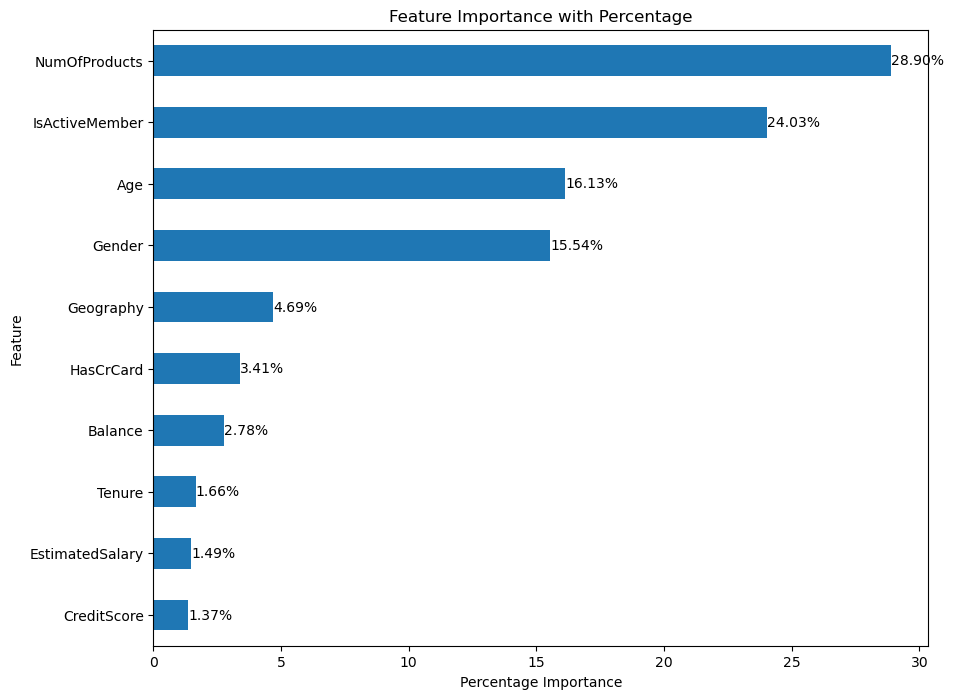

In [40]:
show_feature_importance(xg_tuned.best_estimator_)

#### Melihat klasifikasi report dan confussion matrix

Text(0.5, 1.0, 'Confusion Matrix')

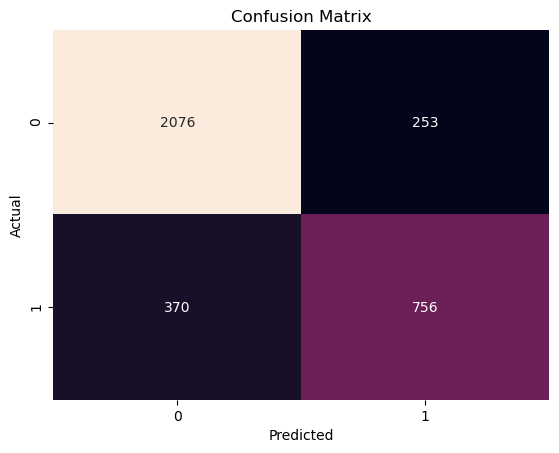

In [62]:
xgb_pred = xg_tuned.predict(X_test)
cf = confusion_matrix(y_test, xgb_pred)
# Visualisasi confusion matrix dengan nilai 0 dan 1 di atas kolom
sns.heatmap(cf, annot=True, fmt='.0f', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [33]:
xgb_pred = xg_tuned.predict(X_test)
report = classification_report(y_test, xgb_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2329
           1       0.75      0.67      0.71      1126

    accuracy                           0.82      3455
   macro avg       0.80      0.78      0.79      3455
weighted avg       0.82      0.82      0.82      3455



### Dampak yang akan terjadi ketika recall tinggi:

Dampak dari model yang memprediksi bahwa sejumlah pelanggan tidak akan churn padahal sebenarnya mereka akan churn, biasanya akan merugikan perusahaan bank dalam beberapa cara diantaranya:

1. Kehilangan Pelanggan: Ketika model salah memprediksi bahwa pelanggan tidak akan churn, sementara sebenarnya mereka churn, perusahaan bank akan kehilangan pelanggan yang seharusnya bisa mereka pertahankan. Ini berarti berkurangnya pendapatan dan keuntungan, karena perusahaan harus mencari pelanggan baru untuk menggantikan yang hilang.

2. Hilangnya Pendapatan: Pelanggan yang churn biasanya berarti hilangnya sumber pendapatan. Pelanggan yang tetap setia biasanya memberikan pendapatan rutin bagi perusahaan bank melalui biaya-biaya perbankan, bunga, atau produk-produk keuangan lainnya. Ketika model gagal mengidentifikasi pelanggan yang akan churn, perusahaan kehilangan sumber pendapatan ini.

3. Biaya Akuisisi Pelanggan Baru: Untuk menggantikan pelanggan yang churn, perusahaan bank harus menghabiskan sumber daya untuk menarik pelanggan baru. Ini melibatkan biaya akuisisi pelanggan, seperti promosi, iklan, dan insentif untuk menarik pelanggan baru. Biaya ini bisa cukup besar, dan kesalahan dalam memprediksi churn dapat meningkatkannya.

4. Dampak Reputasi: Kesalahan dalam memprediksi churn dapat merusak reputasi perusahaan bank. Pelanggan yang merasa tidak dipahami atau diperlakukan secara tidak adil oleh bank mereka mungkin akan kehilangan kepercayaan dan beralih ke bank lain. Ini dapat mengurangi citra positif perusahaan dan mengurangi kepercayaan pelanggan terhadap bank tersebut.

### Dampak yang akan terjadi ketika precision tinggi : 

Dampak dari model yang memprediksi bahwa sejumlah pelanggan akan churn padahal sebenarnya mereka tidak akan churn bisa mencakup:

1. Kehilangan Kepercayaan Pelanggan: Ketika model salah memprediksi bahwa pelanggan akan churn padahal sebenarnya mereka tidak akan churn, dapat menyebabkan kehilangan kepercayaan pelanggan terhadap bank. Pelanggan yang diberi tahu bahwa mereka akan churn padahal sebenarnya tidak, mungkin akan merasa tidak dipahami dan bahkan mungkin mencari bank lain yang lebih akurat dalam prediksi.

2. Biaya Rendah: Model yang menghasilkan banyak false positives (kasus di mana pelanggan diprediksi akan churn, tetapi sebenarnya tidak) dapat menyebabkan biaya yang tidak perlu. Bank mungkin menghabiskan sumber daya untuk mencoba mempertahankan pelanggan yang sebenarnya tidak memiliki niat untuk churn.

3. Kebingungan dan Ketidakpuasan Pelanggan: Kesalahan prediksi semacam ini dapat menyebabkan kebingungan di antara pelanggan dan meningkatkan ketidakpuasan. Pelanggan yang menerima komunikasi atau tindakan pencegahan yang tidak sesuai dengan situasinya mungkin merasa terganggu atau tidak puas.

4. Penggunaan Sumber Daya yang Tidak Efisien: Bank mungkin mengalokasikan sumber daya dan usaha untuk mengatasi masalah churn yang sebenarnya tidak ada. Hal ini dapat mengalihkan sumber daya yang seharusnya digunakan untuk tujuan lain yang lebih kritis.

### Cara mengurangi faktor negative hasil prediksi

Ada beberapa cara untuk mengurangi hal tersebut diantaranya : 
- Mengurangi False Positives (FP):
Jika bank lebih fokus pada menghindari pengeluaran dan sumber daya yang tidak perlu dalam upaya retensi pelanggan, maka mengurangi FP bisa menjadi prioritas. Dalam konteks ini, bank ingin memastikan bahwa mereka hanya mengambil tindakan retensi pada pelanggan yang benar-benar akan churn.Ini bisa menghemat biaya operasional dan sumber daya yang dikeluarkan untuk mempertahankan pelanggan.

- Mengurangi False Negatives (FN):
Jika bank lebih fokus pada mempertahankan pelanggan dan mencegah kehilangan bisnis, maka mengurangi FN bisa menjadi prioritas. Dalam konteks ini, bank ingin memastikan bahwa mereka tidak melewatkan pelanggan yang benar-benar akan churn.
Mengurangi FN dapat membantu bank mengambil tindakan retensi yang lebih dini dan efektif, sehingga menjaga pendapatan dan keuntungan.

Karena saya ingin mengurangi faktor dari kedua hal diatas, saya akan mementingkan nilai akurasi F1-Score dikarenakan F1-Score merupakan metriks pengukuran gabungan untuk mengurangi kedua faktor tersebut.

### Eksperimen yang telah dilakukan

1. Memakai 2 Model/Algoritma yang berbeda sesuai dengan tingkat persentase model yang tinggi dalam menyelesaikan kasus tersebut.
2. Melakukan analisa pada learning curve di kedua model agar dapat menemukan hyperparameter yang optimal untuk kedua model.
3. Melakukan berbagai uji coba pada kedua model dengan mengubah-ubah hyperparameter sehingga mendapatkan hasil yang best-fit antara score train dan test pada masing-masing metrics evaluasi.

### Alasan memilih model XGBoost dan RandomForestClassifier

Ada beberapa alasan mengapa kami memilih XGBoost atau Random Forest sebagai model untuk tugas klasifikasi dengan label target yang tidak seimbang (imbalance):

1. Keandalan Terhadap Ketidakseimbangan Kelas: Kedua model ini memiliki sifat yang cenderung lebih baik dalam menangani masalah ketidakseimbangan kelas daripada beberapa model lain. Mereka memiliki kemampuan untuk menangkap pola di kelas minoritas dengan baik, terutama ketika digunakan dengan parameter yang sesuai.

2. Ensemble Learning: Kedua model ini adalah model ensemble yang memadukan beberapa pohon keputusan. Ensemble learning membantu mengurangi dampak outlier dan meningkatkan kinerja model secara keseluruhan.

3. Parameter yang Dapat Diatur: XGBoost dan Random Forest memiliki banyak parameter yang dapat disesuaikan. Ini memungkinkan Anda untuk menyesuaikan model sesuai dengan kebutuhan Anda dan mengatasi masalah ketidakseimbangan kelas. Misalnya, Anda dapat mengatur bobot kelas atau mengoptimalkan parameter seperti min_samples_leaf (pada Random Forest) atau min_child_weight (pada XGBoost) untuk mengontrol pertumbuhan model.

4. Skalabilitas dan Kinerja: Kedua model ini sering kali efisien dalam hal waktu pelatihan dan kinerja. Ini membuat mereka menjadi pilihan yang baik bahkan untuk dataset yang besar.

5. Fitur Penting: XGBoost dan Random Forest dapat memberikan informasi tentang fitur yang paling penting dalam membuat prediksi. Ini dapat membantu Anda memahami faktor-faktor yang mempengaruhi hasil prediksi dan memungkinkan Anda untuk mengoptimalkan fitur-fitur yang digunakan dalam model.

### Hasil dari model XGBoost dan RandomForestClassifier

**Model XGBoost**

- Accuracy (Train Set): 0.85
- Accuracy (Test Set): 0.82
- Precision (Train Set): 0.82
- Precision (Test Set): 0.75
- Recall (Train Set): 0.72
- Recall (Test Set): 0.67
- F1-Score (Train Set): 0.76
- F1-Score (Test Set): 0.71
- roc_auc (train-proba): 0.92
- roc_auc (test-proba): 0.89
- roc_auc (crossval train): 1.0
- roc_auc (crossval test): 0.8942509838742044

**Model RandomForestClassifier**

- Accuracy (Train Set): 0.85
- Accuracy (Test Set): 0.82
- Precision (Train Set): 0.83
- Precision (Test Set): 0.75
- Recall (Train Set): 0.69
- Recall (Test Set): 0.64
- F1-Score (Train Set): 0.75
- F1-Score (Test Set): 0.69
- roc_auc (train-proba): 0.93
- roc_auc (test-proba): 0.88
- roc_auc (crossval train): 1.0
- roc_auc (crossval test): 0.894206981211345

Pada hasil kedua model diatas, saya memakai seluruh evaluasi metrics yang penting untuk tugas klasifikasi dan untuk melihat performa dari kedua model, tetapi saya mengutamakan 1 metrics yaitu nilai F1-Score.

Kenapa saya memilih F1-Score, karena tujuan dari pembuatan model saya ini ialah untuk mengurangi kasus FN dan FP seperti yang sudah dijelaskan diatas mengenai dampak-dampak FN dan FP jika terlalu tinggi. Oleh karena itu, F1-Score menjadi metrics yang dapat menyeimbangkan dan mengurangi kedua kasus tersebut.

**Hyperparameter yang digunakan pada XGBoost**: 

- 'max_depth' : [int(x) for x in np.linspace(0, 5, num = 11)],
- 'min_child_weight' : [int(x) for x in np.linspace(1, 15, num = 11)],
- 'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
- 'tree_method' : ['auto', 'exact', 'approx', 'hist'],
- 'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num=11)],
- 'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],
- 'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
- 'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]


1. max_depth:

- Rentang: [0, 5]

Max Depth mengontrol kedalaman maksimum dari setiap pohon dalam ensemble. Mengatur nilai maksimum dapat membantu menghindari overfitting (nilai rendah) atau underfitting (nilai tinggi). Kami menggunakan rentang dari 0 hingga 5 untuk mencoba variasi dalam kompleksitas model.

2. min_child_weight:

- Rentang: [1, 15]

Ini adalah treshold minimum untuk jumlah contoh dalam sebuah node. Mengatur nilai ini dapat mengendalikan overfitting. Anda menggunakan rentang yang luas untuk mencoba variasi dalam kebijakan splitting.

3. gamma:

- Rentang: [0, 1]

Gamma adalah parameter yang digunakan untuk mengontrol kapan sebuah node akan dibagi berdasarkan penurunan dalam fungsi objektif. Ini membantu mengurangi overfitting dengan menghilangkan pembagian yang tidak signifikan. Anda menggunakan rentang ini untuk mengevaluasi dampak berbagai tingkat pemotongan.

4. tree_method:

- ['auto', 'exact', 'approx', 'hist']

Tree method adalah metode yang digunakan untuk membuat pohon dalam XGBoost. 'auto' akan memilih metode terbaik secara otomatis. 'exact' menggunakan perhitungan eksak, 'approx' menggunakan perkiraan, dan 'hist' menggunakan perhitungan histogram. Anda mencoba berbagai metode untuk melihat mana yang bekerja paling baik.

5. colsample_bytree:

- Rentang: [0, 1]

Ini adalah fraksi dari fitur yang digunakan untuk melatih setiap pohon. Mengurangi nilai dapat mengurangi overfitting dengan mengurangi kompleksitas model. Anda mencoba berbagai fraksi untuk mengevaluasi dampaknya.

6. eta:

- Rentang: [0, 1]

Eta adalah learning rate yang mengontrol sejauh mana model menyesuaikan berdasarkan kesalahan residual. Rentang yang luas memberikan fleksibilitas dalam menyesuaikan laju pembelajaran model.

7. lambda dan alpha:

- Rentang: [0, 1]

Lambda dan alpha adalah parameter regularisasi yang membantu mengendalikan kompleksitas model. Lambda adalah regularisasi L2 (Ridge) dan alpha adalah regularisasi L1 (Lasso). Anda mencoba berbagai nilai untuk menghindari overfitting.

**Hyperparameter yang digunakan pada RandomForestClassifier**:

- n_estimators = [int(x) for x in np.linspace(1, 25, 50)]
- criterion = ['gini', 'entropy']
- max_depth = [int(x) for x in np.linspace(2, 50, 50)]
- min_samples_split = [int(x) for x in np.linspace(2, 50, 15)]
- min_samples_leaf = [int(x) for x in np.linspace(2, 100, 15)]

1. n_estimators:

- Rentang: [1, 25]

n_estimators mengontrol jumlah pohon keputusan dalam ensemble. Semakin banyak pohon yang Anda tambahkan, semakin kuat model Anda, tetapi juga semakin kompleks dan membutuhkan lebih banyak waktu komputasi. Anda mencoba berbagai nilai untuk mengevaluasi seberapa baik model berkinerja dengan jumlah pohon yang berbeda.

2. criterion:

- ['gini', 'entropy']

criterion adalah metrik yang digunakan untuk mengukur kualitas pemisahan node dalam pohon. 'gini' mengukur impuritas dengan Gini impurity, sedangkan 'entropy' menggunakan entropi. Anda mencoba kedua metrik untuk melihat mana yang lebih cocok untuk data Anda.

3. max_depth:

- Rentang: [2, 50]

max_depth mengatur kedalaman maksimum dari setiap pohon dalam ensemble. Mengatur nilai yang lebih besar dapat memungkinkan model untuk mengekstraksi pola yang lebih kompleks, tetapi juga dapat meningkatkan risiko overfitting. Anda mencoba variasi kedalaman untuk melihat dampaknya pada kinerja model.

4. min_samples_split:

- Rentang: [2, 50]

min_samples_split adalah jumlah sampel minimum yang diperlukan untuk membagi sebuah node. Mengurangi nilai ini dapat membuat model lebih cenderung untuk membagi node, yang dapat menghasilkan pohon yang lebih dalam dan kompleks. Anda mencoba berbagai nilai untuk mengevaluasi dampaknya pada struktur pohon.

5. min_samples_leaf:

- Rentang: [2, 100]

min_samples_leaf adalah jumlah sampel minimum yang diperlukan di setiap leaf node. Mengurangi nilai ini dapat menghasilkan daun yang lebih sedikit tetapi lebih murni, yang bisa menghasilkan model yang lebih kompleks. Anda mencoba berbagai nilai untuk mengevaluasi dampaknya pada kompleksitas model.

### Feature Importance

1. Feature importance pada model XGBoost :
- (3 teratas)
- NumOfProducts
- IsActiveMember
- Age

2. Feature importance pada model RandomForestClassifier:
- (3 teratas)
- Age
- NumOfProducts
- IsActiveMember

Dapat dilihat bahwa 3 teratas dari kedua model sama tetapi urutan nya saja yang berbeda, dapat disimpulkan bahwa pada model **XGBoost** jumlah produk yang dimiliki oleh customer memiliki peranan penting dalam menentukan apakah customer tersebut akan churn atau tidak. Disisi lain, pada model **RandomForestClassifier** usia customer sangat berperan penting untuk menentukan apakah customer tersebut akan churn atau tidak.

1. Evaluasi Feature yang Paling Penting pada kedua model:

- NumOfProducts (Jumlah Produk): Feature ini sangat penting dalam kedua model, menunjukkan bahwa jumlah produk yang dimiliki oleh seorang pelanggan memiliki dampak signifikan pada keputusan apakah mereka akan churn atau tidak. Ini mungkin menunjukkan bahwa pelanggan yang memiliki lebih banyak produk cenderung lebih puas atau terikat dengan layanan Bank.

- IsActiveMember (Keanggotaan Aktif): Feature ini juga penting dalam kedua model, menunjukkan bahwa apakah seorang pelanggan adalah anggota aktif atau tidak memiliki pengaruh besar pada keputusan churn. Pelanggan yang lebih aktif mungkin lebih cenderung tetap berlangganan.

- Age (Usia): Usia pelanggan memiliki peranan yang signifikan dalam model RandomForestClassifier. Ini bisa berarti bahwa usia dapat menjadi faktor penting dalam memprediksi churn, dengan pelanggan yang lebih muda atau lebih tua cenderung memiliki tingkat churn yang berbeda.

2. Business Insights:

- Jumlah produk yang dimiliki oleh pelanggan dan keanggotaan aktif adalah faktor-faktor kunci dalam mempengaruhi churn. Dari sini, kita dapat menyimpulkan bahwa menjaga pelanggan agar tetap memiliki lebih banyak produk dan menjadi anggota aktif sangat penting untuk mengurangi churn.

- Usia pelanggan juga penting dalam model RandomForestClassifier, yang bisa berarti bahwa strategi yang berbeda mungkin diperlukan untuk mengelola churn di antara kelompok usia yang berbeda. Misalnya, mungkin perlu fokus pada penyediaan layanan atau promosi yang lebih sesuai dengan kelompok usia tertentu.

3. Rekomendasi Tindakan:

Untuk menjaga pelanggan, Bank dapat mengambil beberapa tindakan, seperti:
- Menawarkan insentif atau penawaran khusus kepada pelanggan yang memiliki lebih banyak produk, untuk mendorong mereka tetap aktif.

- Memotivasi pelanggan yang belum aktif untuk mengambil tindakan atau mengambil keuntungan dari layanan tambahan yang bisa Bank tawarkan.

- Untuk kelompok usia, Bank dapat merancang kampanye pemasaran atau penawaran khusus yang lebih sesuai dengan preferensi dan kebutuhan mereka.